In [1]:
import scipy

<img src="./img/Bayes.png"></img>

The prior, P(w), shows our prior beliefs. In this case, it shows what we believe about Reign’s weight before we even put her on the scale.

The likelihood, P(m | w), shows the probability that our measurements would occur for a particular weight. It’s also called the likelihood of the data.

The posterior, P(w | m), shows the probability of Reign being a given weight, given the measurements we made. This is what we are most interested in.

Probability of data, P(m), shows the probability that any given data point will be measured. For now we’ll assume this is a constant, that is, that the scale is unbiased.

We assume a **uniform prior**, meaning that its probability distribution is a constant for all values. This lets us reduce Bayes’ Theorem to P(w | m) = P(m | w).

In [2]:
measurement = [13.9, 17.5, 14.1]

We want to calculate our probability of our measurement given actual weight P(m | w)

In [20]:
import scipy.stats as st
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

### MLE
<img src="./img/MLE.png"></img>

0.15937014593
Maximum probability for this mean : 15.1515151515


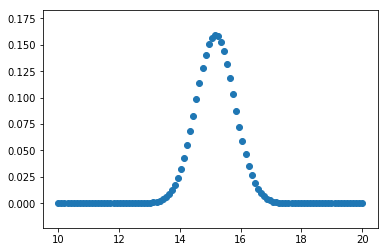

In [32]:
probability_of_getting_values = []
space = np.linspace(10,20,100)
for x in space:
    rv = st.norm(x,np.sqrt(1.2))
    probability_of_getting_values.append(np.product(rv.pdf(measurement))*100)
plt.scatter(space, probability_of_getting_values)
print (max(probability_of_getting_values))
print ("Maximum probability for this mean :", space[np.argmax(probability_of_getting_values)])

## MAP
<img src="./img/MAP.png"></img>

0.0454113466356
Maximum probability for this mean : 14.8484848485


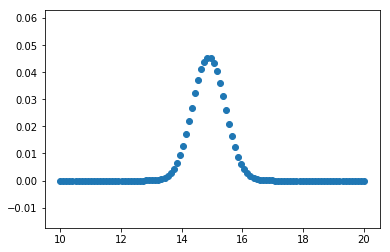

In [33]:
prior = st.norm(14.2, 1.0) # what I believe before I see any data

probability_of_getting_values = []
space = np.linspace(10,20,100)
for x in space:
    rv = st.norm(x,np.sqrt(1.2))
    probability_of_getting_values.append(np.product(rv.pdf(measurement)) * prior.pdf(x) *100)
plt.scatter(space, probability_of_getting_values)
print (max(probability_of_getting_values))
print ("Maximum probability for this mean :", space[np.argmax(probability_of_getting_values)])

We did a survey and we get results 

democrat_voters = 93
republican_voters = 7

but our prior believe is that the ratio is 50:50. We can simulate it with our prior. We choose beta distribution (The Beta distribution is appropriate to express prior belief about a Bernoulli distribution). We can express our believe in prior in alpha/beta ration.

<img src="./img/MAP_Bernoulli.png"></img>

<img src="./img/MAP_Bernoulli_2.png"></img>

<a href="http://www.mi.fu-berlin.de/wiki/pub/ABI/Genomics12/MLvsMAP.pdf">Taken from</a>

alpha=beta=1
15.7560007665
Maximum probability for this mean : 0.929292929293

alpha=beta=5
13.8618530567
Maximum probability for this mean : 0.89898989899

alpha=beta=50
12.6329276492
Maximum probability for this mean : 0.717171717172

alpha=beta=100
14.5214823706
Maximum probability for this mean : 0.646464646465

alpha=beta=1000
33.6048044262
Maximum probability for this mean : 0.525252525253

alpha=beta=10000
84.9234104753
Maximum probability for this mean : 0.505050505051



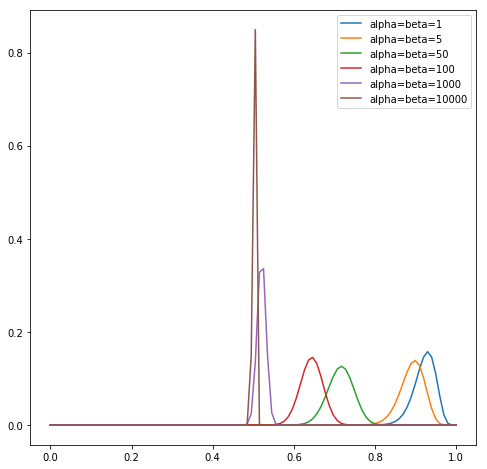

In [141]:
all_voters = 100
democrat_voters = 93
republican_voters = 7
survey = [1] * democrat_voters + [0] * republican_voters
space = np.linspace(0,1,100)

plt.figure(figsize=(8,8))
for alpha in [1,5,50,100,1000, 10000]:
    prior = st.beta(alpha, alpha) # what I believe before I see any data

    probability_of_getting_values = []    
    for x in space:
        rv = st.bernoulli(x)
        probability_of_getting_values.append(np.product(rv.pmf(survey)) * prior.pdf(x))

    probability_of_getting_values = probability_of_getting_values/np.sum(probability_of_getting_values) #normalize
    plt.plot(space, probability_of_getting_values, label="alpha=beta=%d" % alpha)
    print ("alpha=beta=%d" % alpha)
    print (max(probability_of_getting_values) * 100)
    print ("Maximum probability for this mean :", space[np.argmax(probability_of_getting_values)])
    print ()
plt.legend()

### NEXT EXAMPLES

Euro problem - When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110.

5.02725662588
Maximum probability for this mean : 0.555555555556
0.56


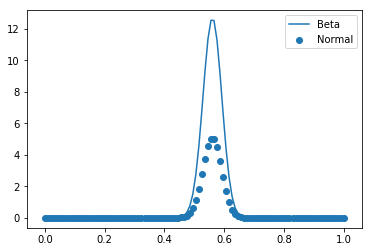

In [69]:
#MLE
data = [140, 110]
probability_of_getting_values = []
space = np.linspace(0,1,100)
for x in space:
    rv = st.binom(250, x)
    probability_of_getting_values.append(rv.pmf(data[0]) * 100)
plt.scatter(space, probability_of_getting_values, label="Normal")
print (max(probability_of_getting_values))
print ("Maximum probability for this mean :", space[np.argmax(probability_of_getting_values)])

# we can use Beta destribution because we assume uniform distribution as a prior (it is the same as Beta(1,1))
beta_euro = st.beta(140,110)
print (beta_euro.mean())
plt.plot(space, [beta_euro.pdf(x) for x in space], label="Beta")
plt.legend()

2.21199291539
Maximum probability for this mean : 0.555555555556


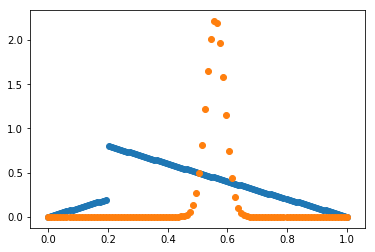

In [76]:
prior = lambda x,y : y if x <= 0.2 else 1 - y  # what I believe before I see any data

plt.scatter(space, [prior(x,x) for x in space])

data = [140, 110]
num_measurements = 250
probability_of_getting_values = []
space = np.linspace(0,1,100)
for x in space:
    rv = st.binom(250, x)
    probability_of_getting_values.append(rv.pmf(data[0]) * prior(x, data[0]/num_measurements) * 100)

plt.scatter(space, probability_of_getting_values)
print (max(probability_of_getting_values))
print ("Maximum probability for this mean :", space[np.argmax(probability_of_getting_values)])

**Cromwell's rule**, named by statistician Dennis Lindley,[1] states that the use of prior probabilities of 0 ("the event will definitely not occur") or 1 ("the event will definitely occur") should be avoided. The phrase has become well known and frequently quoted:
**I beseech you, in the bowels of Christ, think it possible that you may be mistaken.**

The Beta distribution is appropriate to express prior belief about a Bernoulli distribution.

## Naive Bayes


Naive bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and effective method.

The probability of a class value given a value of an attribute is called the conditional probability. By multiplying the conditional probabilities together for each attribute for a given class value, we have a probability of a data instance belonging to that class.

To make a prediction we can calculate probabilities of the instance belonging to each class and select the class value with the highest probability.

In [142]:
import math
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [144]:
x = 71.5
mean = 73
stdev = 6.2
probability = calculateProbability(x, mean, stdev)
print (('Probability of belonging to this class: {0}').format(probability))

Probability of belonging to this class: 0.06248965759370005


In [145]:
st.norm(mean, stdev).pdf(x)

0.062489657593700051

In [170]:
x = [[]] *3

In [171]:
x[2].append(1)

In [172]:
x

[[1], [1], [1]]

In [184]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated
        
        
data = [[1,20,0], [2,21,1], [3,22,0], [2,22,1], [3,21,1], [1,19,0]]
separateByClass(data)

{0: [[1, 20, 0], [3, 22, 0], [1, 19, 0]],
 1: [[2, 21, 1], [2, 22, 1], [3, 21, 1]]}

In [185]:
list(zip(*data))

[(1, 2, 3, 2, 3, 1), (20, 21, 22, 22, 21, 19), (0, 1, 0, 1, 1, 0)]

In [186]:
def summarize(dataset):
    summaries = [(np.mean(attribute), np.std(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

summarize(data)

[(2.0, 0.81649658092772603), (20.833333333333332, 1.0671873729054748)]

In [187]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

summarizeByClass(data)

{0: [(1.6666666666666667, 0.94280904158206336),
  (20.333333333333332, 1.247219128924647)],
 1: [(2.3333333333333335, 0.47140452079103168),
  (21.333333333333332, 0.47140452079103168)]}

In [190]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

calculateClassProbabilities(summarizeByClass(data), [1,21])

{0: 0.091377219830392237, 1: 0.010216005012163182}

In [191]:
def classify(class_probabilities):
    best_cl = 0
    best_probability = 0
    for cl, probability in class_probabilities.items():
        if probability > best_probability:
            best_probability = probability
            best_cl = cl
    return best_cl

In [192]:
classify(calculateClassProbabilities(summarizeByClass(data), [1,21]))

0